# Homework 1 (Income Prediction)

The goal of this assignment is to predict whether an individual makes more or less than $50,000 given demographic data. A data dictionary was provided:  

age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [39]:
# analysis packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import compose
from sklearn.compose import make_column_selector
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import warnings

## Part 1: EDA

In [6]:
# read training data from .csv
trainDF = pd.read_csv('./adult.csv')

# drop id column (wont be used for modeling)
trainDF.drop('id', axis = 1, inplace = True)

# check data frame dimension
display(trainDF.shape)

# peek at data
display(trainDF.head())

# check data types
display(trainDF.info())

# check for missing data
display(trainDF.isna().sum())

(32561, 15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Numeric Predictors

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


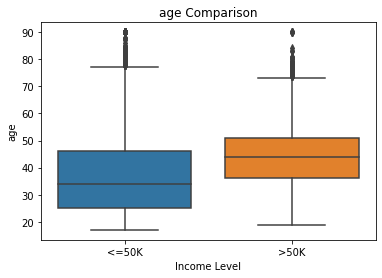

age    0.0
dtype: float64

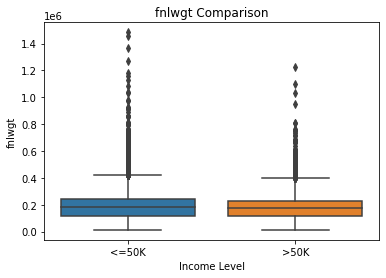

fnlwgt    0.0
dtype: float64

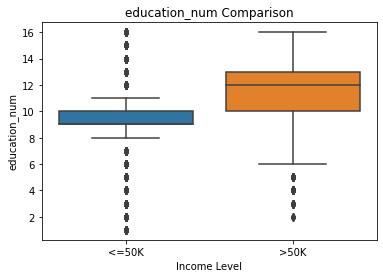

education_num    0.0
dtype: float64

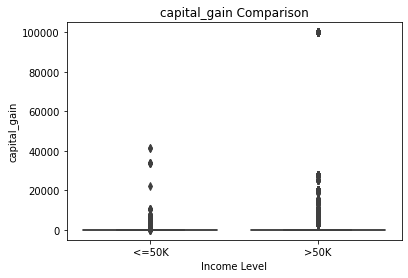

capital_gain    3.414377e-108
dtype: float64

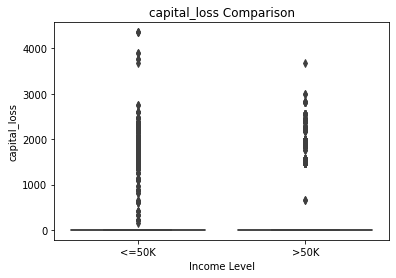

capital_loss    0.003841
dtype: float64

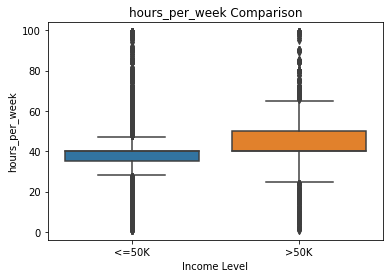

hours_per_week    0.0
dtype: float64

In [40]:
# summarize numeric data
display(trainDF.describe())

#suppress warnings
warnings.filterwarnings('ignore')

# numeric analysis function
def studyNumPredictor(pred):
    # boxplot by income level
    plot = sns.boxplot(x = trainDF['income'], y = trainDF[pred])
    plot.set(xlabel = 'Income Level', title = f"{pred} Comparison")
    plt.show()

    # single logistic regression
    logFit = LogisticRegression().fit(np.array(trainDF[pred]).reshape(-1, 1), trainDF['income'])
    logFit = sm.Logit(pd.get_dummies(trainDF['income'])['>50K'], trainDF[pred]).fit(disp = 0)
    display(logFit.pvalues)


# identify and study numeric predictors
findNumPredictors = make_column_selector(dtype_include = int)
for pred in trainDF[findNumPredictors].columns:
    studyNumPredictor(pred)